# Exploratory Data Analysis

EDA for the AB_Test_Results.csv. This dataset is from [Kaggle](https://www.kaggle.com/datasets/sergylog/ab-test-data).

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
from scipy.stats import shapiro

## Load data

In [2]:
df = pd.read_csv("Data/AB_Test_Results.csv")

In [3]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [4]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [5]:
df[df.duplicated(subset=['USER_ID'])==True]

,USER_ID,VARIANT_NAME,REVENUE
106,7704,control,0.0
195,8406,variant,0.0
224,7042,variant,0.0
283,4064,variant,0.0
302,4409,control,0.0
...,...,...,...
9992,9303,variant,0.0
9993,2400,variant,0.0
9994,3129,control,0.0
9995,1981,control,0.0


In [6]:
df[df.duplicated()]

,USER_ID,VARIANT_NAME,REVENUE
106,7704,control,0.0
195,8406,variant,0.0
224,7042,variant,0.0
302,4409,control,0.0
422,1621,variant,0.0
...,...,...,...
9989,2444,variant,0.0
9993,2400,variant,0.0
9994,3129,control,0.0
9995,1981,control,0.0


In [7]:
df_control = df[df.VARIANT_NAME == 'control'].copy()
df_control

,USER_ID,VARIANT_NAME,REVENUE
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
6,2849,control,0.0
7,9168,control,0.0
...,...,...,...
9988,428,control,0.0
9994,3129,control,0.0
9995,1981,control,0.0
9998,7741,control,0.0


In [8]:
df_control.describe()

,USER_ID,REVENUE
count,4984.000000,4984.000000
mean,4989.436798,0.129013
std,2905.145109,3.007524
min,2.000000,0.000000
25%,2466.000000,0.000000
50%,4964.500000,0.000000
75%,7576.250000,0.000000
max,10000.000000,196.010000


In [9]:
len(df_control[df_control.REVENUE > 30])

2

In [10]:
df_control[df_control.REVENUE > 30]

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01
9421,6792,control,41.53


In [11]:
df_control[df_control.REVENUE == 196.01]

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01


In [12]:
df[df.USER_ID == 3342]

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01


In [13]:
df_variant = df[df.VARIANT_NAME == 'variant'].copy()
df_variant

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.00
4,6174,variant,0.00
5,2380,variant,0.00
8,6205,variant,0.00
13,2529,variant,2.15
...,...,...,...
9991,8864,variant,0.00
9992,9303,variant,0.00
9993,2400,variant,0.00
9996,502,variant,0.00


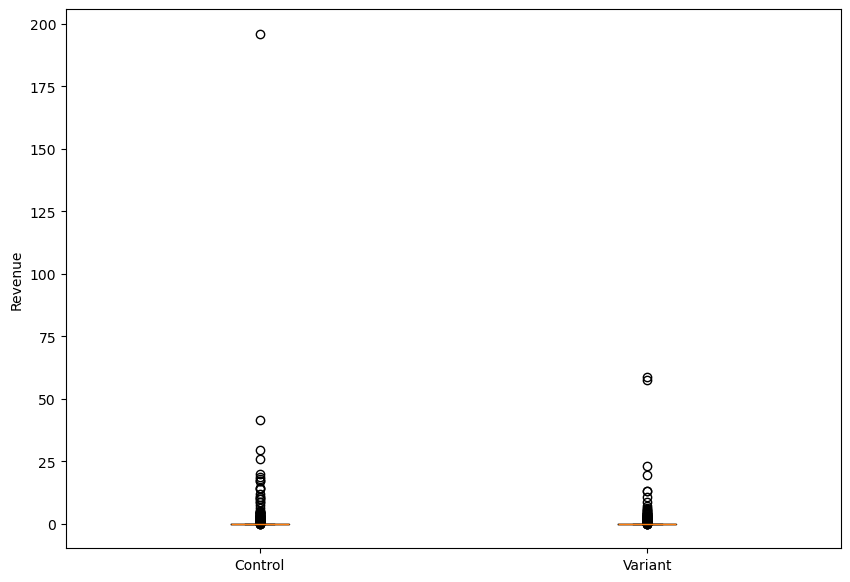

In [14]:
plt.figure(figsize =(10, 7))

plt.boxplot([df_control.REVENUE, df_variant.REVENUE])
plt.xticks([1, 2], ['Control', 'Variant'])
plt.ylabel('Revenue')
plt.show()

In [15]:
df_variant.describe()

,USER_ID,REVENUE
count,5016.000000,5016.000000
mean,4972.776914,0.070070
std,2876.320625,1.314802
min,3.000000,0.000000
25%,2476.500000,0.000000
50%,4958.500000,0.000000
75%,7415.250000,0.000000
max,10000.000000,58.630000


In [16]:
df[df.USER_ID == 7704]

,USER_ID,VARIANT_NAME,REVENUE
56,7704,control,0.0
106,7704,control,0.0
2252,7704,variant,0.0


In [17]:
df[(df.USER_ID == 9214)]

,USER_ID,VARIANT_NAME,REVENUE
2342,9214,variant,0.0
6505,9214,control,0.0
9997,9214,variant,0.0


### Control group

In [18]:
df_control.head()

,USER_ID,VARIANT_NAME,REVENUE
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
6,2849,control,0.0
7,9168,control,0.0


In [19]:
df_variant[df_variant.REVENUE > 50]

,USER_ID,VARIANT_NAME,REVENUE
6447,2881,variant,58.63
7642,7206,variant,57.46


Remove an outlier for df_control

In [20]:
df_control = df_control[df_control.REVENUE < 50].copy()

In [21]:
df_control[df_control.REVENUE > 50]

,USER_ID,VARIANT_NAME,REVENUE


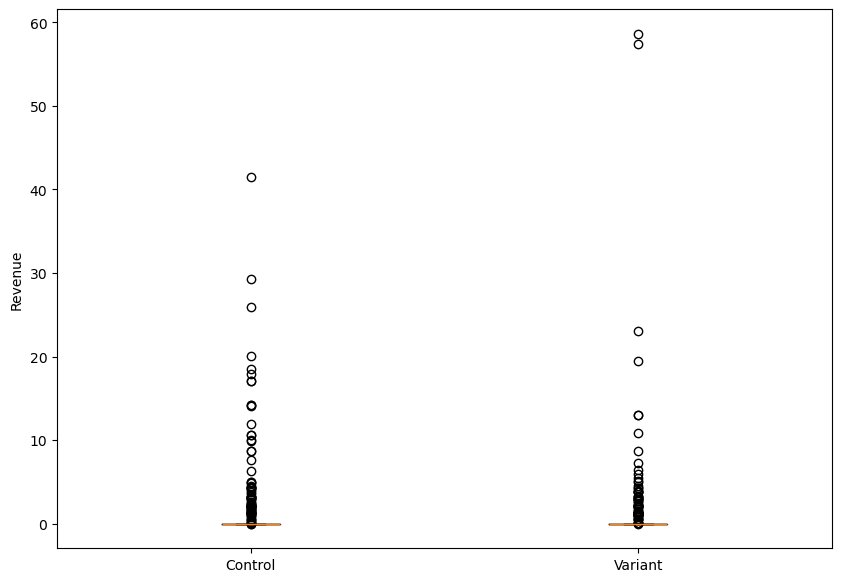

In [22]:
plt.figure(figsize =(10, 7))

plt.boxplot([df_control.REVENUE, df_variant.REVENUE])
plt.xticks([1, 2], ['Control', 'Variant'])
plt.ylabel('Revenue')
plt.show()

In [23]:
control_std = np.std(df_control.REVENUE)
variant_std = np.std(df_variant.REVENUE)

## Choose sample size

Baseline conversion rate: the control group's expected conversion rate

Minimum detectable effect (MDE): the minimum improvement compared to baseline that you want the experiment to detect.

Example: Baseline conversion rate of 20% and you want to detect a 2% increase in conversion rate, then MDE would be 10%.

$$ \text{MDE} = \frac{\text{Desired coversion rate (2\%)}}{\text{Baseline conversion rate (20\%)}} \cdot 100\%$$

Let p1 be baseline conversion rate.
$$p_1 = 20\%$$
$$p_2 = p_1 + \left| \text{MDE} \right| $$
$$\alpha = 5\% $$
$$\beta = 20\% $$
$$Z_{\alpha/2} = Z_{5\%/2} = -1.96$$
$$Z_{\beta} = Z_{20\%} = -0.84$$

The sample size is:

$$ n = \left(\frac{Z_{\alpha/2} \sqrt{2 p_1 (1 - p_1)} + Z_{\beta} \sqrt{p_1(1 - p_1) + p_2 (1 - p_2)}}{\left| p_2 - p_1 \right|}\right)^2 $$

## Conversion rate

Conversions are any action taken online that aligns with a business’s goals. This could be filling out a form, making a purchase, completing a survey, and so on.

Conversion rate refers to the number of conversions that occur in a given timeframe, and is usually expressed as a percentage. For example, if 100 visitors visit a website and 10 of them make a purchase, the conversion rate is 10%. The conversion rate metric helps businesses understand how effectively their website transforms visitors into customers. 

In [24]:
df_control_unique = df_control.drop_duplicates().copy()

In [25]:
len(df_control_unique)

3972

In [26]:
df_control_unique[df_control_unique.REVENUE > 0]

,USER_ID,VARIANT_NAME,REVENUE
49,6429,control,3.25
152,8607,control,2.99
333,8020,control,9.91
628,6365,control,10.63
758,4445,control,17.05
...,...,...,...
9421,6792,control,41.53
9466,6623,control,1.78
9612,1035,control,0.23
9711,6468,control,2.93


In [27]:
79/len(df_control_unique)

0.019889224572004028

In [28]:
df_variant_unique = df_variant.drop_duplicates().copy()

In [29]:
df_variant_unique[df_variant_unique.REVENUE > 0]

,USER_ID,VARIANT_NAME,REVENUE
13,2529,variant,2.15
139,3331,variant,4.27
149,8110,variant,1.75
540,5845,variant,1.26
1119,8175,variant,5.45
...,...,...,...
9168,443,variant,3.75
9307,2767,variant,2.24
9651,9928,variant,1.25
9725,702,variant,2.92


In [30]:
len(df_variant_unique)

3960

In [31]:
72/len(df_variant_unique)

0.01818181818181818

In [32]:
# Baseline conversion rate
p1 = 79/len(df_control)

# MDE
mde = 0.005/p1

p2 = p1 + np.abs(mde)
alpha = 0.05
beta = 0.20

z_alpha2 = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(beta)

In [33]:
p2

0.3312336501065648

In [34]:
z_alpha2

1.959963984540054

In [35]:
n = (z_alpha2*np.sqrt(2*p1*(1 - p1)) + z_beta*np.sqrt(p1*(1 - p1) + p2*(1 - p2)))**2/((p2 - p1)**2)

In [36]:
n

0.04066815442981716

In [37]:
intersection = pd.Index(df_control['USER_ID']).intersection(df_variant['USER_ID'])

In [38]:
len(intersection)

1541

In [39]:
intersection

Index([2423, 9411, 7311, 2849, 2667, 7951, 3610, 2653, 8275, 4303,
       ...
       8996, 2525, 3365,  457, 4225, 4927, 7327, 2347, 4851, 7925],
      dtype='int64', name='USER_ID', length=1541)

In [40]:
df_control[df_control.USER_ID == 2423]

,USER_ID,VARIANT_NAME,REVENUE
1,2423,control,0.0
5243,2423,control,0.0


In [41]:
df_intersection = pd.merge(df_control, df_variant, on="USER_ID").copy()

In [42]:
df_intersection[df_intersection.REVENUE_x > 0]

,USER_ID,VARIANT_NAME_x,REVENUE_x,VARIANT_NAME_y,REVENUE_y
333,7358,control,17.87,variant,0.00
360,5270,control,0.50,variant,0.00
361,5270,control,0.50,variant,0.00
438,8863,control,1.50,variant,0.00
543,9661,control,3.24,variant,0.00
655,2489,control,3.25,variant,0.00
663,1106,control,1.25,variant,0.00
800,4870,control,2.00,variant,0.00
802,701,control,17.08,variant,0.00
968,618,control,2.19,variant,0.00


In [43]:
df_intersection[(df_intersection.REVENUE_x > 0) & (df_intersection.REVENUE_y > 0)]

,USER_ID,VARIANT_NAME_x,REVENUE_x,VARIANT_NAME_y,REVENUE_y
1994,1252,control,1.26,variant,1.25


In [44]:
df_intersection[df_intersection.REVENUE_y > 0]

,USER_ID,VARIANT_NAME_x,REVENUE_x,VARIANT_NAME_y,REVENUE_y
114,6214,control,0.00,variant,1.36
266,1252,control,0.00,variant,1.25
453,8984,control,0.00,variant,0.84
542,2881,control,0.00,variant,58.63
594,2529,control,0.00,variant,2.15
614,2767,control,0.00,variant,2.24
716,7915,control,0.00,variant,1.26
741,9996,control,0.00,variant,6.46
751,8175,control,0.00,variant,5.45
881,828,control,0.00,variant,0.60


In [45]:
df_variant[df_variant.USER_ID == 9411]

,USER_ID,VARIANT_NAME,REVENUE
4062,9411,variant,0.0


In [46]:
df[df.USER_ID == 737]

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
5993,737,variant,0.0


In [47]:
len(df_control.USER_ID.unique())

3930

## Sign-up

In [48]:
df_variant_unique

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.00
4,6174,variant,0.00
5,2380,variant,0.00
8,6205,variant,0.00
13,2529,variant,2.15
...,...,...,...
9982,2259,variant,0.00
9990,4883,variant,0.00
9991,8864,variant,0.00
9992,9303,variant,0.00


In [49]:
attribute = ['Control', 'Variant']

conversion = {'Control': (len(df_control_unique[df_control_unique.REVENUE == 0]),
                         len(df_control_unique[df_control_unique.REVENUE > 0])),
            'Variant': (len(df_variant_unique[df_variant_unique.REVENUE == 0]),
                       len(df_variant_unique[df_variant_unique.REVENUE > 0]))}
conversion

{'Control': (3893, 79), 'Variant': (3888, 72)}

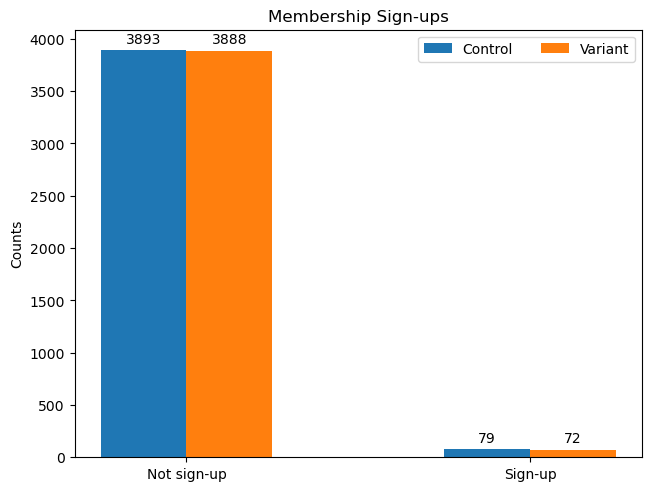

In [51]:
x = np.arange(2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in conversion.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Membership Sign-ups')
ax.set_xticks(x + width/2, ['Not sign-up', 'Sign-up'])
ax.legend(loc='upper right', ncols=3)
#ax.set_ylim(0, 250)

plt.show()

## Check to see if there are any users in both control and variant group

In [52]:
df_intersection_test = pd.merge(df_control_unique, df_variant_unique, on="USER_ID").copy()

In [53]:
df_intersection_test

,USER_ID,VARIANT_NAME_x,REVENUE_x,VARIANT_NAME_y,REVENUE_y
0,2423,control,0.0,variant,0.0
1,9411,control,0.0,variant,0.0
2,7311,control,0.0,variant,0.0
3,2849,control,0.0,variant,0.0
4,2667,control,0.0,variant,0.0
...,...,...,...,...,...
1566,4927,control,0.0,variant,0.0
1567,7327,control,0.0,variant,0.0
1568,2347,control,0.0,variant,0.0
1569,4851,control,0.0,variant,0.0


In [57]:
df_control_unique[df_control_unique.USER_ID == 2423]

,USER_ID,VARIANT_NAME,REVENUE
1,2423,control,0.0


In [62]:
df_intersection_test[(df_intersection_test.REVENUE_x > 0) & (df_intersection_test.REVENUE_y > 0)]

,USER_ID,VARIANT_NAME_x,REVENUE_x,VARIANT_NAME_y,REVENUE_y
1307,1252,control,1.26,variant,1.25


In [63]:
df_intersection_test[(df_intersection_test.REVENUE_x == 0) & (df_intersection_test.REVENUE_y > 0)]

,USER_ID,VARIANT_NAME_x,REVENUE_x,VARIANT_NAME_y,REVENUE_y
93,6214,control,0.0,variant,1.36
207,1252,control,0.0,variant,1.25
345,8984,control,0.0,variant,0.84
409,2881,control,0.0,variant,58.63
455,2529,control,0.0,variant,2.15
470,2767,control,0.0,variant,2.24
533,7915,control,0.0,variant,1.26
550,9996,control,0.0,variant,6.46
555,8175,control,0.0,variant,5.45
642,828,control,0.0,variant,0.60


In [66]:
len(df_intersection_test[(df_intersection_test.REVENUE_x == 0) & (df_intersection_test.REVENUE_y > 0)])

29

In [64]:
df_intersection_test[(df_intersection_test.REVENUE_x > 0) & (df_intersection_test.REVENUE_y == 0)]

,USER_ID,VARIANT_NAME_x,REVENUE_x,VARIANT_NAME_y,REVENUE_y
254,7358,control,17.87,variant,0.0
275,5270,control,0.50,variant,0.0
336,8863,control,1.50,variant,0.0
410,9661,control,3.24,variant,0.0
496,2489,control,3.25,variant,0.0
500,1106,control,1.25,variant,0.0
586,4870,control,2.00,variant,0.0
588,701,control,17.08,variant,0.0
703,618,control,2.19,variant,0.0
726,6678,control,1.52,variant,0.0


In [67]:
len(df_intersection_test[(df_intersection_test.REVENUE_x > 0) & (df_intersection_test.REVENUE_y == 0)])

25

In [58]:
df_variant_unique[df_variant_unique.USER_ID == 2423]

,USER_ID,VARIANT_NAME,REVENUE
8556,2423,variant,0.0


## A/B Testing

For continuous metric, the Z-statistic is computed as:

$$ Z = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} $$

where 
$$\bar{X_1} \hspace{1mm} \text{and} \hspace{1mm} \bar{X_2} \hspace{1mm} \text{are sample means}$$ 
$$\sigma_1 \hspace{1mm} \text{and} \hspace{1mm} \sigma_2 \hspace{1mm} \text{are sample standard deviation}$$
$$n_1 \hspace{1mm} \text{and} \hspace{1mm} n_2 \hspace{1mm} \text{are number of observations}$$ 

If we consider the conversion metric, the Z-statistic is computed as:

$$ Z = \frac{p_1 - p_2}{\sqrt{\frac{p_1 \cdot (1 - p_1)}{n_1} + \frac{p_2 \cdot (1 - p_2)}{n_2}}} $$

where
$$p_1 \hspace{1mm} \text{and} \hspace{1mm} p_2 \hspace{1mm} \text{are conversion rates in the control and variant groups, respectively}$$ 
$$n_1 \hspace{1mm} \text{and} \hspace{1mm} n_2 \hspace{1mm} \text{are number of observations}$$ 

In [ ]:
control_mean = np.mean(df_control_unique.REVENUE)
variant_mean = np.mean(df_variant_unique.REVENUE)

In [ ]:
control_std = np.std(df_control_unique.REVENUE)
variant_std = np.std(df_variant_unique.REVENUE)

In [ ]:
control_std

In [ ]:
variant_std

In [ ]:
n1 = len(df_control_unique)
n2 = len(df_variant_unique)

In [ ]:
(control_mean - variant_mean)

In [ ]:
control_std**2

In [ ]:
z_stat = (control_mean - variant_mean)/np.sqrt((control_std)**2/n1 + (variant_std)**2/n2)
z_stat

In [ ]:
p_val = 1 - stats.norm.cdf(z_stat)
p_val